<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/JARVIS_Solar_Accelerated_Discovery_of_Efficient_Solar_Cell_Materials_Using_Quantum_and_Machine_Learning_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reference**: [Accelerated Discovery of Efficient Solar Cell Materials Using Quantum and Machine-Learning Methods](https://pubs.acs.org/doi/full/10.1021/acs.chemmater.9b02166)

In [1]:
!pip install jarvis-tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 962 kB 13.0 MB/s 
     |████████████████████████████████| 325 kB 23.3 MB/s 


In [2]:
from jarvis.db.figshare import data
import pandas as pd
df=pd.DataFrame(data('dft_3d'))

Obtaining 3D dataset 55k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1


100%|██████████| 31.9M/31.9M [00:00<00:00, 52.4MiB/s]


Loading the zipfile...
Loading completed.


In [6]:
df2=df[df['slme']!='na']

In [7]:
df2.columns

Index(['jid', 'spg_number', 'spg_symbol', 'formula',
       'formation_energy_peratom', 'func', 'optb88vdw_bandgap', 'atoms',
       'slme', 'magmom_oszicar', 'spillage', 'elastic_tensor',
       'effective_masses_300K', 'kpoint_length_unit', 'maxdiff_mesh',
       'maxdiff_bz', 'encut', 'optb88vdw_total_energy', 'epsx', 'epsy', 'epsz',
       'mepsx', 'mepsy', 'mepsz', 'modes', 'magmom_outcar', 'max_efg',
       'avg_elec_mass', 'avg_hole_mass', 'icsd', 'dfpt_piezo_max_eij',
       'dfpt_piezo_max_dij', 'dfpt_piezo_max_dielectric',
       'dfpt_piezo_max_dielectric_electronic',
       'dfpt_piezo_max_dielectric_ionic', 'max_ir_mode', 'min_ir_mode',
       'n-Seebeck', 'p-Seebeck', 'n-powerfact', 'p-powerfact', 'ncond',
       'pcond', 'nkappa', 'pkappa', 'ehull', 'dimensionality', 'efg',
       'xml_data_link', 'typ', 'exfoliation_energy', 'spg', 'crys', 'density',
       'poisson', 'raw_files', 'nat', 'bulk_modulus_kv', 'shear_modulus_gv',
       'mbj_bandgap', 'hse_gap', 'reference'

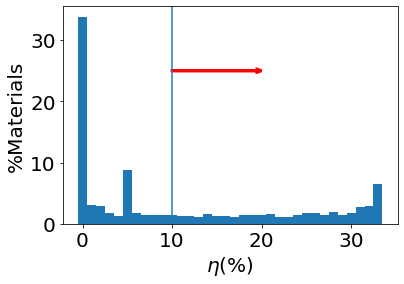

In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt

def arr2pctarr(arr=[]):
  summ=np.sum(np.array(arr))
  new_arr=[100*float(i)/float(summ) for i in arr]
  return new_arr
  
sz=20
params = {'legend.fontsize': sz,
         'axes.labelsize': sz,
         'axes.titlesize':sz,
         'xtick.labelsize':sz,
         'ytick.labelsize':sz}
pylab.rcParams.update(params)
cutoff=34
intvl=1
hist_3d, bins_3d = np.histogram(df2['slme'],bins=np.arange(0, cutoff + intvl, intvl), density=False)
plt.rcParams['font.size'] = 20.0
y_tmp=arr2pctarr(hist_3d)
plt.bar(bins_3d[:-1],y_tmp,width=1)
plt.xlabel('$\eta$(%)')
plt.ylabel('%Materials')
plt.axvline(x=10.0)

plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
#ax.annotate('', xy=(25,15),xytext=(15,15),arrowprops=dict(arrowstyle="->"))
plt.arrow(10,25,10,0,fc='red', ec='red',shape='full', length_includes_head=True,width = 0.015, edgecolor = 'red',  lw = 3,head_width=.5, head_length=0.5)           
  

In [34]:
# df3=df2[['mbj_bandgap','slme']].replace('na',np.nan).dropna()
# plt.plot(df3['mbj_bandgap'],df3['slme'],'.')
# plt.xlim([.3,2.7])
# plt.ylim([10,35])

In [44]:
df3=df2[['slme','effective_masses_300K']]
slme=[]
elec_eff_mass=[]
for i,j in df3.iterrows():
  if j['effective_masses_300K'] and 'n' in j['effective_masses_300K'] and j['effective_masses_300K']['n']!='na' and j['slme']>=10 :
    m=np.mean(np.array(j['effective_masses_300K']['n']))
    elec_eff_mass.append(m)
    slme.append(j['slme'])

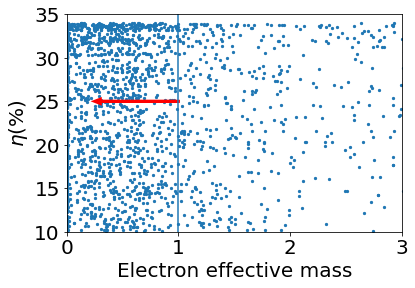

In [53]:
plt.scatter(elec_eff_mass,slme,s=5)
plt.xlim([0,3])
plt.ylim([10,35])
plt.axvline(x=1.0)
plt.xlabel('Electron effective mass')
plt.ylabel('$\eta$(%)')
plt.arrow(1,25,-0.75,0,fc='red', ec='red',shape='full', length_includes_head=True,width = 0.015, edgecolor = 'red',  lw = 3,head_width=0.5, head_length=0.05)


Obtaining raw io files 145k...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Loading the zipfile...
Loading completed.
zip_file_url https://ndownloader.figshare.com/files/23634737


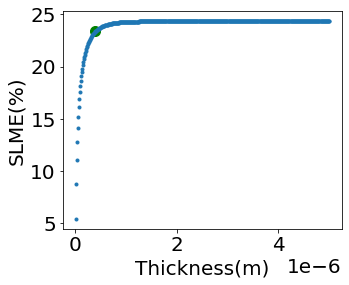

In [63]:
from matplotlib.gridspec import GridSpec
import requests,zipfile,os,io,tempfile
from jarvis.io.vasp.outputs import Vasprun
from jarvis.analysis.solarefficiency.solar import SolarEfficiency


fls = data("raw_files")

def saturation_point(arr, tol=1):
    # assuming monotonic array
    maxa = max(arr)
    mina = min(arr)
    for i, ii in enumerate(arr):
        if abs(maxa - arr[i]) <= tol:
            return i


def get_tbmbj_vasprun(jid="JVASP-29640"):
    for i in fls["TBMBJ"]:
        if i["name"].split(".zip")[0] == jid:
            return i


jid='JVASP-29640'

plt.rcParams.update({"font.size": 20})
plt.figure(figsize=(5,4))

x = get_tbmbj_vasprun(jid=jid)
zip_file_url=x["download_url"]
print('zip_file_url',zip_file_url)
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
wdat = z.read("vasprun.xml").decode("utf-8")
fd, path = tempfile.mkstemp()
with os.fdopen(fd, "w") as tmp:
    tmp.write(wdat)
    v=Vasprun(path)

dirgap = v.get_dir_gap
indirgap = v.get_indir_gap[0]
en, abz = v.avg_absorption_coefficient
abz = np.array(abz) * 100
thickness = np.arange(1e-8, 5e-6, 1e-8)
effs = []
for i in thickness:

    eff = SolarEfficiency().slme(
        en, abz, dirgap, indirgap, plot_current_voltage=False, thickness=i,
        #en, abz, dirgap, indirgap, plot_current_voltage=False, thickness=i,
    )
    # eff = info["efficiency"]
    effs.append(eff*100)
optm = saturation_point(effs)
opt_thickness = thickness[optm]
opt_eff = effs[optm]

img = io.BytesIO()

plt.xlabel("Thickness(m)")
plt.ylabel("SLME(%)")
plt.plot(thickness, effs, ".")
plt.scatter([opt_thickness], [opt_eff], s=100, color="g")

# plt.subplot(the_grid[1])
# plt.title("(b)")
# temperatures=np.arange(10,100,5)
# effs=[]
# for t in temperatures:
#     info = tmp_slme(en, abz, indirgap, indirgap, plot_current_voltage=False,thickness=opt_thickness,temperature=t)
#     eff=info['efficiency']
#     effs.append(eff)
# optm=saturation_point(effs)
# opt_temp=temperatures[optm]
# opt_eff=effs[optm]
# plt.plot(temperatures,effs,'.')
# plt.scatter([opt_thickness],[opt_eff],s=100,color='g')
# info = SolarEfficiency().slme(
#     en,
#     abz,
#     dirgap,
#     indirgap,
#     plot_current_voltage=True,
#     thickness=opt_thickness,
# )
# plt.plot(info["V"], info["JV"])
# plt.ylabel("J (arb. unit)")
# plt.xlabel("Voltage(V)")
# plt.plot(info['V'],info['PV'],linestyle="--",label='PV')
# plt.legend()

# plt.tight_layout()
plt.show()
# plt.savefig(img, format="png")
# img.seek(0)
# plot_url = base64.b64encode(img.getvalue()).decode()
# print("opt_thickness,opt_eff", opt_thickness, opt_eff)

# return plot_url


In [54]:
pip freeze

absl-py==1.0.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.2.0
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.4.0
audioread==2.1.9
autograd==1.4
Babel==2.10.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.4
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2022.5.18.1
cffi==1.15.0
cftime==1.6.0
chardet==3.0.4
charset-normalizer==2.0.12
click==7.1.2
cloudpickle==1.3.0
cmake==3.22.4
cmdstanpy==0.9.5
colorcet==3.0.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.4.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.11.0
cymem==2.0.6
Cython==0.29.30
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.5.1
distribu